In [6]:
import numpy as np
import cv2
import os
from  Scripts.Utility import Utility2
util = Utility2()


in init


### Compare zoom levels of same image

Using the same position, compare all three zoom-levels

In [7]:
root_dir = os.path.abspath("../")
path= '/Scripts/TestImages' #skal have '/' før Scripts

images= util.loadImages(path)
unaltered_images = util.loadImages(path)

gray_images = []
tresh_images = []
for x in range(len(images)):
    gray_images.append(cv2.cvtColor(images[x], cv2.COLOR_BGR2GRAY))

tresh_images = util.thresholdImages(gray_images, invert=False)
cv2.imwrite("Tresholded_channel.jpg",tresh_images[4] )
cv2.imwrite("FluorescentInput.jpg", images[4])

#fluorescent is 0,2,4
pairs = []

_merge = cv2.addWeighted(gray_images[1], 0.5, tresh_images[0],0.5, 0.0)
pairs.append(_merge)

In [12]:
# noise removal
#kernel = np.ones((3,3),np.uint8)
#opening = cv2.morphologyEx(tresh_images[0],cv2.MORPH_OPEN,kernel, iterations = 2)
## sure background area
#sure_bg = cv2.dilate(opening,kernel,iterations=3)
##cv2.imshow("sure_bg0",cv2.resize(tresh_images[0],(500,500)))
##cv2.imshow("sure_bg",cv2.resize(sure_bg,(500,500)))
#
## Finding sure foreground area
#dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
#ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
## Finding unknown region
#sure_fg = np.uint8(sure_fg)
#unknown = cv2.subtract(sure_bg,sure_fg)
#cv2.imshow("unknown",cv2.resize(unknown,(500,500)))
# Marker labelling
num_markers, markers = cv2.connectedComponents(tresh_images[4])

test_img = images[5]


# Markers: 0 is Bacground
test_img[markers == 1] = [255,0,0] #BLUE  1: top right blob
test_img[markers == 18] = [0,255,0] # GREEN  10 big blob (18)
test_img[markers == 49] = [0,0,255] # RED 6: left most blob (49)

In [21]:
bg = np.where(markers==0)
x,y = bg
print(len(x))
print(2048*2048)
print(len(x)/(2048*2048))


4060208
4194304
0.9680290222167969


In [19]:
#cv2.imshow("TestLabeling0", cv2.resize(test_img,(500,500)))
#cv2.imwrite("LabeledImage.jpg", test_img)


alpha = 0.5
beta = 1-alpha
test2 = cv2.addWeighted(test_img,alpha,unaltered_images[5],beta,0.0)
#cv2.imshow("Test", cv2.resize(test_img,(500,500)))
#cv2.imshow("Original", cv2.resize(unaltered_images[5],(500,500)))
#cv2.imshow("TestMerge", cv2.resize(test2,(500,500)))
#cv2.imwrite("LabeledMerge2.jpg", test2)


collection = [gray_images[4], tresh_images[4],test2 ]
#col2 = []

#billede= util.h_concatenate_images(col2)

util.showImages(collection, scale=(500,500))

In [9]:
#im2, contours, hierarchy = cv2.findContours(test_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

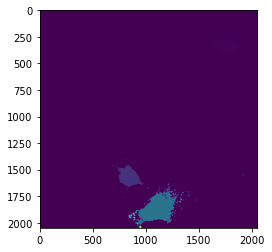

In [10]:
import matplotlib.pyplot as plt
plt.imshow(markers)
plt.show()

In [11]:
blarg = False


if blarg is False:
    print("None is false")

None is false


In [2]:
Wells= [1,2,3,4,5,6]
Positions = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for x in Wells:
    for y in Positions:
        print("Well"+str(x)+"_Positions"+str(y))

Well1_Positions1
Well1_Positions2
Well1_Positions3
Well1_Positions4
Well1_Positions5
Well1_Positions6
Well1_Positions7
Well1_Positions8
Well1_Positions9
Well1_Positions10
Well1_Positions11
Well1_Positions12
Well1_Positions13
Well1_Positions14
Well1_Positions15
Well1_Positions16
Well2_Positions1
Well2_Positions2
Well2_Positions3
Well2_Positions4
Well2_Positions5
Well2_Positions6
Well2_Positions7
Well2_Positions8
Well2_Positions9
Well2_Positions10
Well2_Positions11
Well2_Positions12
Well2_Positions13
Well2_Positions14
Well2_Positions15
Well2_Positions16
Well3_Positions1
Well3_Positions2
Well3_Positions3
Well3_Positions4
Well3_Positions5
Well3_Positions6
Well3_Positions7
Well3_Positions8
Well3_Positions9
Well3_Positions10
Well3_Positions11
Well3_Positions12
Well3_Positions13
Well3_Positions14
Well3_Positions15
Well3_Positions16
Well4_Positions1
Well4_Positions2
Well4_Positions3
Well4_Positions4
Well4_Positions5
Well4_Positions6
Well4_Positions7
Well4_Positions8
Well4_Positions9
Well4_Posi

In [7]:
# 6 wells
#   16 pos x 3 zooms
    #x positions are always in the 3rd zoom level

    #ex:  x = 1 -> 1st image of 3rd zoom level, well 1 =
def Well_Pos_from_X(x):

    #Find the well x is in
    AllPos = x % 16
    print("AllPos"+str(AllPos))
    #find the position in the well
    Well=  int(AllPos/5)+1
    Position = x-(Well*16*3)
    print("W: "+str(Well), "P: "+str(Position))

Well_Pos_from_X(16)







AllPos0
W: 1 P: -32
